**Quick links**
- [GitHub repo for website](https://github.com/socialdata-project/socialdata-project.github.io)
- [GitHub website page](https://socialdata-project.github.io/)

# Motivation
- What is your dataset?
> We have a set of mortality rates caused by self-harm from the [Institute for Health Metrics and Evaluation](https://www.healthdata.org/) (IHME). It has around 70 thousand rows of suicide occurrences with the data of country, age range and sex of each individual from the year 2006 to 2019.
>
> We also use [data from the World Health Organization](https://ourworldindata.org/grapher/who-regions) (WHO) that maps the different countries to the WHO regions.
>
> Lastly, we have an [additional datasource from the Organisation for Economic Co-operation and Development](https://data.oecd.org/inequality/violence-against-women.htm) (OECD). This source provides an index of gender violence by country that we are able to compare with the suicide rates.
>
- Why did you choose this/these particular dataset(s)?
> We want to explore the trends in suicide rates for men and women around the globe. We want to learn the tendencies across sexes in different regions and find possible correlations that could explain these trends. 
>
> For this, we need suicide rates in all countries, which we get from the IHME dataset and the different world regions, which we get from the WHO. Later on, we find an outlier in the Eastern Mediterranean region, that we investigate further and compare with the violence index that we get from OECD, inspired by [this article](https://news.un.org/en/story/2022/07/1121852).
>
- What was your goal for the end user's experience?
> We aim to give visibilty to a taboo topic of tremendous importance. The idea is to give the reader new information about the global trends in suicides, highlighting that men are more likely to commit suicide, which is common in all countries in the world, and ultimately bring awareness to this issue, which could start a conversation and prevent people from commiting self-harm.
>
> In this context, our end user is a person who would be reading our magazine, and thus be able to learn which people are more likely to unalive themselves in order to take action. We want to highlight the importance of finding the reasons why these differences happen to start taking preventive measures.

# Basic stats
### Data processing
- Write about your choices in data cleaning and preprocessing
> The original dataset had values for the suicide rate, percent and number. We chose to focus on rate because we thought this was the best way to compare countries of different sizes and populations.
>
> We also had to do a great deal of work in manually mapping the names of the countries from our different datasets, as not all countries are spelled the same way in all data sources (e.g. 'Viet Nam' vs 'Vietnam'). We also dealt with the fact that not all datasets contain (or recognize) all the countries. In fact, we were unable to find Bermuda, Greenland, Guam, Northern Mariana Islands, Palestine, Puerto Rico, United States Virgin Islands and Tokelau in the list of countries recognized by the WHO. However, as the WHO data is only used for establishing the regions, we assigned these countries the name of a country nearby that geographically belongs to that region.
> This also happened with the geodata that we had to plot the countries in the map, which we manually mapped with a dictionary as can be seen below.

In [4]:
# Import packages
import json
import pandas as pd
import numpy as np
import folium
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import geopandas as gpd
import matplotlib as mpl
import scipy

In [5]:
# Import suicide rate data
data = pd.read_csv("final project/suiciderates.csv")

# Clean data and only get rate
data = data[data["metric_name"]=="Rate"]

In [6]:
# Import WHO region data
regions = pd.read_csv("final project/who-regions.csv")



# Map between the IHME data and WHO data
map_WHO_IHM = {
    "American Samoa": "Samoa",
    "Bermuda":"United States", 
    "Bolivia (Plurinational State of)": "Bolivia", 
    "Brunei Darussalam": "Brunei",
    "Cabo Verde": "Cape Verde",
    "Côte d'Ivoire": "Cote d'Ivoire",
    "Democratic People's Republic of Korea": "North Korea",
    "Democratic Republic of the Congo": "Congo",
    "Greenland": "Denmark",
    "Guam": "Philippines", 
    "Iran (Islamic Republic of)": "Iran",
    "Lao People's Democratic Republic": "Laos",
    "Micronesia (Federated States of)": "Micronesia (country)",
    "Northern Mariana Islands": "Philippines",
    "Palestine": "Jordan",
    "Puerto Rico": "United States", 
    "Viet Nam" : "Vietnam", 
    "Venezuela (Bolivarian Republic of)" : "Venezuela" , 
    "United States of America" : "United States", 
    "United Republic of Tanzania" : "Tanzania", 
    "Timor-Leste" : "Timor" ,
    "Taiwan (Province of China)" : "China",
    "Syrian Arab Republic" : "Syria",
    "Russian Federation" : "Russia",
    "Republic of Moldova" : "Moldova", 
    "Republic of Korea" : "South Korea",
    "Tokelau": "Philippines",
    "United States Virgin Islands": "Dominican Republic"
    }

# Add a column in data with the country region
country_region = []
for country in (data["location_name"]):
    
    # Find if the name in the suicide data matches that of the WHO data
    this_country = list(regions[regions["Entity"]==country]["WHO region"])

    # if it does, find its region
    if this_country:
        this_countrys_region = this_country[0]
        country_region.append(this_countrys_region)
        
    # if it doesn't, look at the mapping above and then find its region
    else:
        mapped_country = map_WHO_IHM[country]
        this_country = list(regions[regions["Entity"]==mapped_country]["WHO region"])
        this_countrys_region = this_country[0]
        country_region.append(this_countrys_region)

data['WHO region'] = country_region

In [7]:
# Import geodata for plotting map
# this data is used to get location codes for countries in our suicide rate data
geodata = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

# Map between the IHME data and geodata
map_GDP_IHM={
    'Venezuela (Bolivarian Republic of)': 'Venezuela',
    'Viet Nam':'Vietnam',
    'United Republic of Tanzania':'Tanzania',
    'Taiwan (Province of China)':'Taiwan',
    'Syrian Arab Republic':'Syria',
    'South Sudan':'S. Sudan',
    'Republic of Moldova':'Moldova',
    'Republic of Korea': 'South Korea',
    'Iran (Islamic Republic of)':'Iran',
    'Eswatini':'eSwatini',
    'Equatorial Guinea':'Eq. Guinea',
    'Dominican Republic':'Dominican Rep.',
    'Central African Republic':'Central African Rep.',
    'Brunei Darussalam':'Brunei',
    'Bosnia and Herzegovina':'Bosnia and Herz.',
    'Bolivia (Plurinational State of)':'Bolivia',
    'Russian Federation':'Russia',
    'United States of America':'United States',
    'Congo': 'Congo, Republic of the',
    'Democratic Republic of the Congo': 'Congo, Democratic Republic of the',
    'Bahamas': 'Bahamas, The',
    'Bolivia (Plurinational State of)':'Bolivia',
    'Czechia':'Czech Republic',
    'Russian Federation':'Russia',
    'United Republic of Tanzania':'Tanzania',
    "Democratic People\'s Republic of Korea":'North Korea',
    "Côte d\'Ivoire":'Cote d\'Ivoire'
    }

### Dataset description and stats
- Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.
> We start by plotting a world map in which we can see the suicide rate of every country throughout the 13 years that our dataset spans. It also has a tooltip feature, as well as the ability to zoom in and out, that allows the user to get the exact data from a country in a given point in time. 
>
> In this map, we can see that the areas where there are more reported suicides are in the north and in the south, having an itermediate band with less rate around the equator, although there are not very discernable differences across the different continents. Despite this, we find very high indexes in East Europe and West Asia, highlighting Russia, Ukraine, Kazakhstan and Lithuania, as well as in Greenland. These high indexes are also present in southern Africa, in countries such as Zimbawue, Bostwana and Lesotho. In America, there is a lower amount of suicides in general, except for Surinam and Guyana.
> If we visualize this map throughout time, we can see that the geographical trends do not vary but the colors of the map do get lighter and greener, indicating that the rates are lowering as the years pass, although the geographical differences are still present.
>
> We also plot barcharts of our statistics. In the first one, we see the 25 countries with the highest mean suicide rate, which gives us an unbiased perception of the same information of the map, since this list shows us the small countries that are easily overlooked on the map such as the Solomon Islands in the Pacific Ocean. In the next two barcharts, we show the mean distributions by age group and gender, showing that the likeliness to commit suicide increases with age (mind that all groups are of 5 years except for the first and last one) and in men, who are around 4 times more likely to unalive themselves than women.
>
> We also show this data throughout time in the next 3 linegraphs, where we can again see that all trends are deciling, indicating that less people commit suicide every year. We also see that this decrease is at a similar rate across all ages and in the same proportion for men and women. In the last subplot is where we can see differences across retions. For instance, Europe's trends are declining at a much faster rate than other regions, followed by Africa. We acknowledge that this could be due to differences in reporting and/or recording of suicides in different cultures.

In [5]:
datarate = data[data.metric_id==3]
thirdmap = datarate.groupby(['location_name','year']).agg(Rate=('val','mean'))
thirdmap = thirdmap.reset_index()
    
q3 = thirdmap
#translate countries name 
q3 = q3.reset_index().drop(columns='index')

for i in range(len(q3['location_name'])):
    if q3.loc[i, 'location_name'] in map_GDP_IHM:
        q3.loc[i, 'location_name'] = map_GDP_IHM[q3.loc[i, 'location_name']]   

merged3= geodata.merge(q3, left_on='COUNTRY', right_on='location_name')       

merged_geodata = merged3

#fig=go.Figure(go)

fig=px.choropleth(merged_geodata,               
              locations="CODE",               
              color="Rate",
              hover_name="location_name",  
              animation_frame="year", 
              color_continuous_scale='GnBu',
              range_color=[0,35], #maybe change to [0,65]
              #opacity=0.8,   
              height=600             
)

fig.update_layout(plot_bgcolor='white', title='Suicide rates (per 100,000 habitants) evolution around the world (2006-2019)',title_xanchor='center',title_x=0.5,
title_font=dict(
        family="Calibri",
        size=16,
        color="#212A4F",
    ))

fig.show()

In [6]:
import plotly 
plotly.offline.plot(fig, filename='f1.html')

'f1.html'

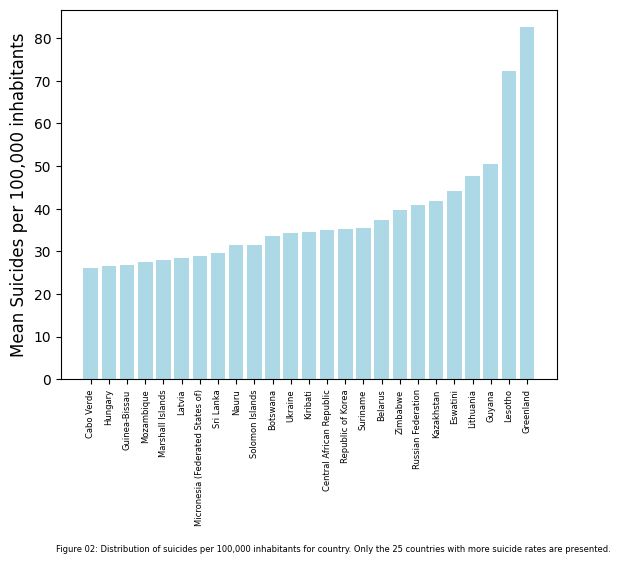

In [7]:
# We plot top 25 countries by mean suicide rate (2006-2019)
means_country = data.groupby('location_name')['val'].mean().sort_values() # Group values by country, calculating the mean suicide rate for each country and ordering based on that value. 
top_25 = means_country[-25:] # Selecting the 25 countries with highest mean suicides per 100,000 inhabitants

# Creating the histogram with our results : 

plt.rcParams.update(plt.rcParamsDefault)
plt.bar(top_25.index, top_25.values, color = "lightblue");
plt.xticks(rotation = 90, size = 6)
plt.ylabel('Mean Suicides per 100,000 inhabitants', fontsize=12)
txt="Figure 02: Distribution of suicides per 100,000 inhabitants for country. Only the 25 countries with more suicide rates are presented."
plt.figtext(0.55, -0.25, txt, wrap=True, horizontalalignment = "center", fontsize=6)
plt.show()

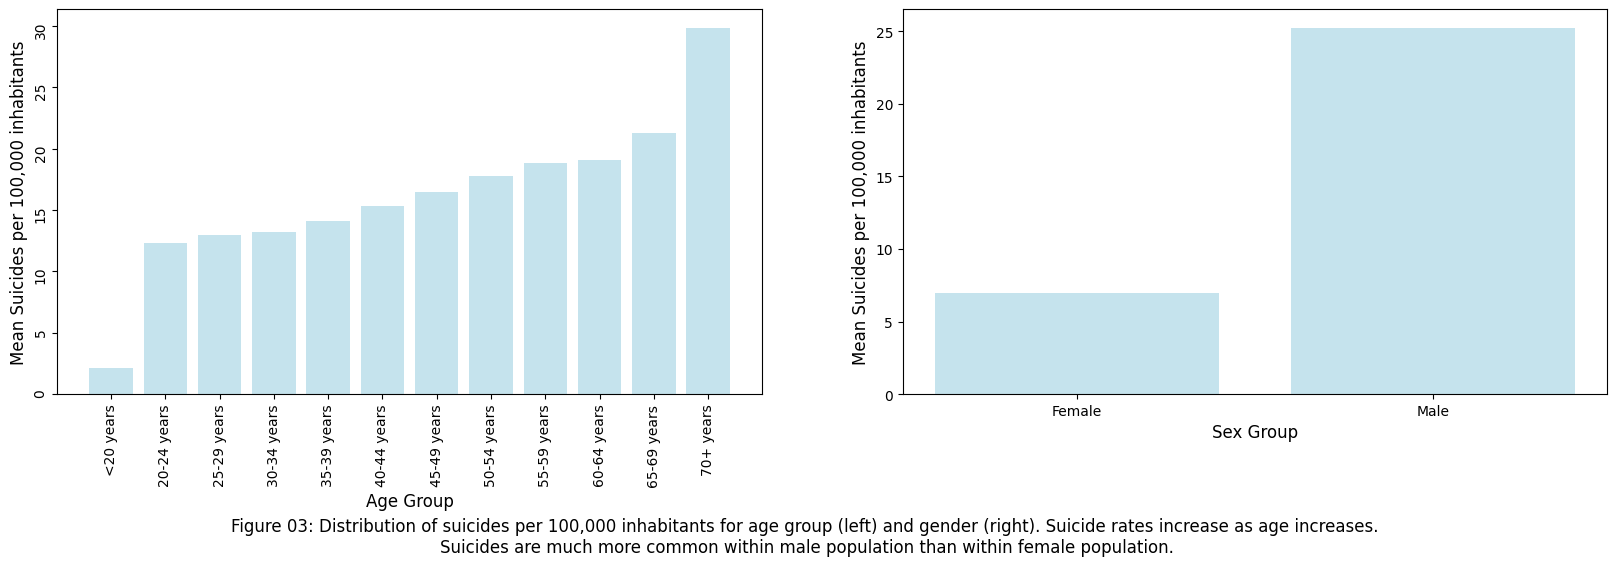

In [8]:
# We plot the mean data distributions by age and sex

fig, ax = plt.subplots(1,2, figsize = (20,5))

# --------------------------------------------------------------------------------------------------------------------------

# BY AGE
# convert the age_name column to a categorical variable with the desired order
age_order = ['<20 years', '20-24 years', "25-29 years",  '30-34 years', '35-39 years', '40-44 years', "45-49 years", '50-54 years', '55-59 years', "60-64 years", "65-69 years", "70+ years"]
data['age_name'] = pd.Categorical(data['age_name'], categories=age_order, ordered=True)
age_group_means = data.groupby('age_name')['val'].mean()

# create histogram
ax[0].bar(age_group_means.index, age_group_means.values, color = "lightblue", alpha = 0.7)
ax[0].set_xlabel('Age Group', fontsize=12)
ax[0].set_ylabel('Mean Suicides per 100,000 inhabitants', fontsize=12)
ax[0].tick_params(labelrotation=90)


# --------------------------------------------------------------------------------------------------------------------------

# BY SEX
sex_group_means = data.groupby('sex_name')['val'].mean()
# Histogram
ax[1].bar(sex_group_means.index, sex_group_means.values, color = "lightblue", alpha = 0.7)
ax[1].set_xlabel('Sex Group', fontsize=12)
ax[1].set_ylabel('Mean Suicides per 100,000 inhabitants', fontsize=12)

txt="Figure 03: Distribution of suicides per 100,000 inhabitants for age group (left) and gender (right). Suicide rates increase as age increases. \nSuicides are much more common within male population than within female population."
plt.figtext(0.5, -0.2, txt, wrap=True, horizontalalignment = "center", fontsize=12)

plt.show()

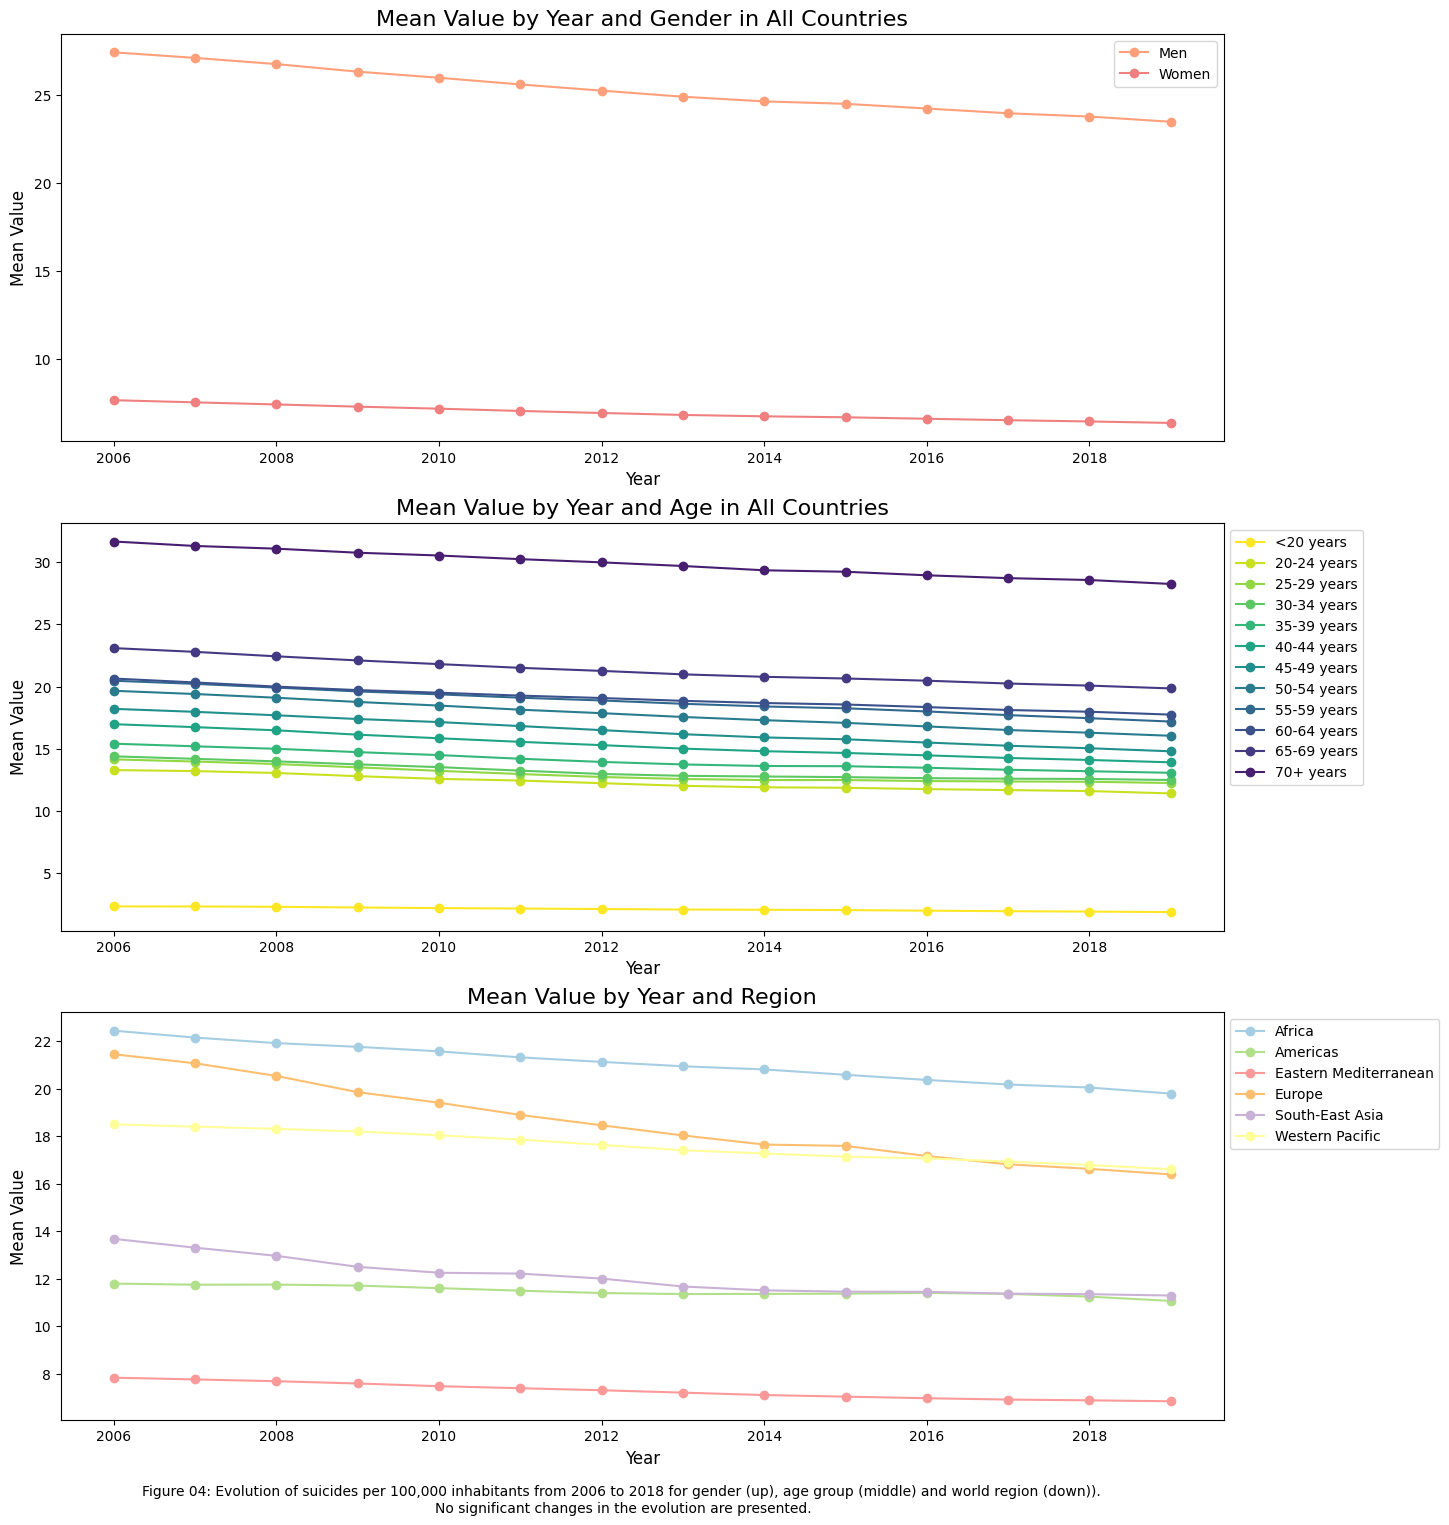

In [9]:
# We plot the line distributions by gender, age and WHO regions throughout the years

fig, ax = plt.subplots(3,1, figsize = (15,18))

# --------------------------------------------------------------------------------------------------------------------------

# BY GENDER
# create two data frames for men and women
data_men = data[data["sex_name"] == "Male"]
data_women = data[data["sex_name"] == "Female"]

# calculate mean values for each year for men and women
year_means_men = data_men.groupby('year')['val'].mean()
year_means_women = data_women.groupby("year")["val"].mean()

# plot the mean values over time for men and women
ax[0].plot(year_means_men.index, year_means_men.values, "-o", color="lightsalmon", label="Men")
ax[0].plot(year_means_women.index, year_means_women.values,"-o", color="lightcoral", label="Women")

# add x and y axis labels, a title, and a legend
ax[0].set_xlabel("Year", fontsize=12)
ax[0].set_ylabel("Mean Value", fontsize=12)
ax[0].set_title("Mean Value by Year and Gender in All Countries", fontsize=16)
ax[0].legend()


# --------------------------------------------------------------------------------------------------------------------------

# BY AGE
# define the colormap to use
colors = cm.viridis_r  # use the viridis colormap in reverse order

# create a plot for each age group, using a different color for each group
for i, age in enumerate(age_order):
    data_int = data[data["age_name"] == age]
    year_means_int = data_int.groupby('year')['val'].mean()
    ax[1].plot(year_means_int.index, year_means_int.values, "-o", label=age, color=colors(i/len(age_order)))
    
ax[1].set_xlabel("Year", fontsize=12)
ax[1].set_ylabel("Mean Value", fontsize=12)
ax[1].set_title("Mean Value by Year and Age in All Countries", fontsize=16)
ax[1].legend(bbox_to_anchor=(1, 1), loc='upper left')


# --------------------------------------------------------------------------------------------------------------------------

# BY REGION
# define the colormap to use
colors = cm.Paired  # use the viridis colormap in reverse order

# create a plot for each region, using a different color for each group
region_list = np.unique(data["WHO region"])
for i, reg in enumerate(region_list):
    data_int = data[data["WHO region"] == reg]
    year_means_int = data_int.groupby('year')['val'].mean()
    ax[2].plot(year_means_int.index, year_means_int.values, "-o", label=reg, color=colors(i/len(region_list)))
    
ax[2].set_xlabel("Year", fontsize=12)
ax[2].set_ylabel("Mean Value", fontsize=12)
ax[2].set_title("Mean Value by Year and Region", fontsize=16)
ax[2].legend(bbox_to_anchor=(1, 1), loc='upper left')


# --------------------------------------------------------------------------------------------------------------------------
txt="Figure 04: Evolution of suicides per 100,000 inhabitants from 2006 to 2018 for gender (up), age group (middle) and world region (down)). \nNo significant changes in the evolution are presented."
plt.figtext(0.5, 0.06, txt, wrap=True, horizontalalignment = "center", fontsize=10)
# set the style of the plot
plt.style.use('ggplot')

# display the plot
plt.show()

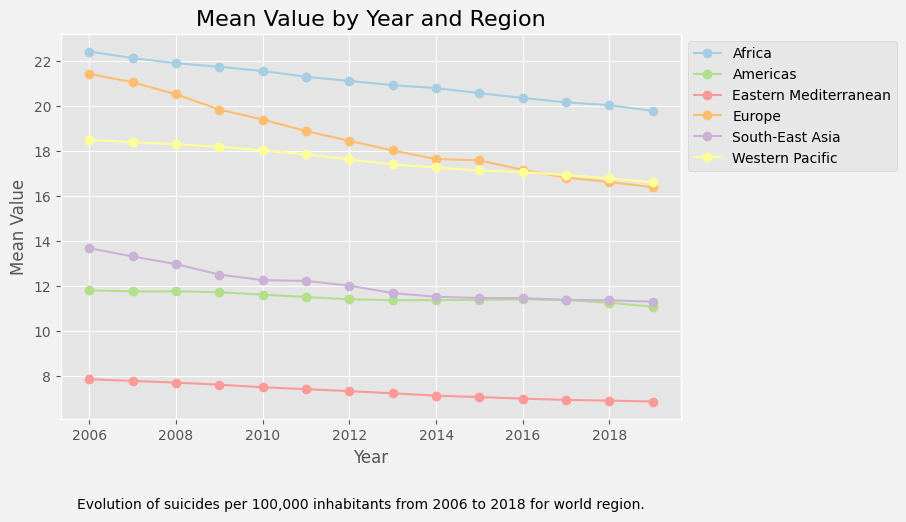

In [10]:
fig = plt.figure(figsize = (8,5))

# define the colormap to use
colors = cm.Paired  # use the viridis colormap in reverse order

# create a plot for each region, using a different color for each group
region_list = np.unique(data["WHO region"])
for i, reg in enumerate(region_list):
    data_int = data[data["WHO region"] == reg]
    year_means_int = data_int.groupby('year')['val'].mean()
    plt.plot(year_means_int.index, year_means_int.values, "-o", label=reg, color=colors(i/len(region_list)))
    
plt.xlabel("Year", fontsize=12)
plt.ylabel("Mean Value", fontsize=12)
plt.title("Mean Value by Year and Region", fontsize=16)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')


# --------------------------------------------------------------------------------------------------------------------------
txt="Evolution of suicides per 100,000 inhabitants from 2006 to 2018 for world region."
plt.figtext(0.5, -0.07, txt, wrap=True, horizontalalignment = "center", fontsize=10)
# set the style of the plot
# plt.style.use('ggplot')

# display the plot
fig.set_facecolor('#f2f2f2')
plt.show()

# Data analysis
Describe your data analysis and explain what you've learned about the dataset.
- The map shows suicide rates vary widely between countries. For some countries in Southern Africa and Eastern Europe, the estimated rates of suicide are high, with over 20 annual deaths per 100,000 people. Meanwhile for other countries in Europe, South America and Asia, the estimated rates of suicide are lower, with under 10 annual deaths per 100,000 people. 
- Suicide rates appear to have declined in recent years in all who regions.
- In the male vs female scatter plot, suicide rates among women and men are compared. Almost all countries are located above the gray diagonal line, which means that the suicide rate was higher among men than women.But the size of the gender disparity varies widely between countries. Some countries lie close to the line, meaning they have a smaller gender disparity. Other countries lie far away and have a large gender difference.
- Suicide rates may vary with age. However, in some countries such as Afghanistan, we can see not only that, but also that within the age groups there is a lot of difference depending on gender










In [9]:


# Map between the suicide dataset's country rate and WHO regions
dict_country_names=map_WHO_IHM 

#select data for year 2019 which is the latest year for which we have data

thisdata=data[data['year']==2019]

#create two separated dataframes for male and female data

data_men = thisdata[thisdata["sex_name"] == "Male"]
data_women = thisdata[thisdata["sex_name"] == "Female"]

# calculate mean values for year 2019 for men and women
ratemen= data_men.groupby(['location_name','WHO region']).agg(Rate=('val','mean')).reset_index()
ratewomen = data_women.groupby(['location_name','WHO region']).agg(Rate=('val','mean')).reset_index()

#create interactive figure
fig=go.Figure()

#we use graphic object scatter
trace=go.Scatter()

regions=pd.unique(ratemen['WHO region'])

x=range(50)

for reg in regions: #we separate and group by WHO region
    regmen=ratemen[ratemen['WHO region']==reg]
    regwomen=ratewomen[ratewomen['WHO region']==reg]
    fig.add_trace(go.Scatter(x=regwomen['Rate'],y=regmen['Rate'],
                  mode='markers',
                  name=reg,
                  opacity=0.6,
                  marker_size=10,
                  text=regwomen['location_name'],
                  hovertemplate="%{text:text}<br>Male rate: %{y:.2f} <br>Female rate: %{x:.2f}"
                  #marker=dict(line_width=ratemen['range'])                                            
                            
                            ))


#we add a y=x line to the graph
fig.add_trace(go.Scatter(x=np.array(range(40)),y=np.array(range(40)),mode='lines',name='Male=Female line', marker_color = "dimgray"))

#caption text
text='Figure 05. Rates of suicides per 100000 males or females in 2019 for different WHO regions.<br> A ratio-one line is shown to distinguish countries where male suicide rate is higher than female suicide rate.<br> All countries except for Afghanistan lie above this line. This graph is interactive, the user can choose what WHO regions are plotted. '

fig.update_layout(title='Male vs. female suicide rate ',   
    font=dict(size=12, family='Calibri'),
    xaxis=dict(title='Female suicide rate<br><sup> </sup>'+'<br><sup>'+text+' </sup>', gridcolor='lightgray'), 
    yaxis=dict(title='Male suicide rate', gridcolor='lightgray'),
    plot_bgcolor='white',
    annotations=[
        go.layout.Annotation(
            x=0.5,
            y=-5,
            text="",
            showarrow=False
        )
    ]
    )


fig.show()




In [12]:
#export interactive grah to html 
import plotly 
plotly.offline.plot(fig, filename='f3.html')

'f3.html'

In [10]:
#select data for Afghanistan
data_afghanistan = data[data["location_name"] == "Afghanistan"]

#we group by year,  age range and gender
datayears=data_afghanistan.groupby(["year",'age_name','sex_name'])["val"].mean().reset_index()

#we define an order for age groups from younger to older
age_order = ['<20 years', '20-24 years', "25-29 years",  '30-34 years', '35-39 years', '40-44 years', "45-49 years", '50-54 years', '55-59 years', "60-64 years", "65-69 years", "70+ years"]
datayears['age_name'] = pd.Categorical(datayears['age_name'], categories=age_order, ordered=True)

#create two separate dataframes for male and females
data_men = datayears[datayears["sex_name"] == "Male"]
data_women = datayears[datayears["sex_name"] == "Female"]

# calculate mean values for each year for men and women
year_means_men = data_men.groupby(['year','age_name'])['val'].mean().reset_index()
year_means_women = data_women.groupby(["year",'age_name'])["val"].mean().reset_index()

#create interactive plot
fig=go.Figure()

#colors for different age groups
agegroup_colors = ['#7FB3D5', '#7CC4D4', '#8BD1C4', '#9BDBAC', '#B2DD9B', '#D6D999', '#E5C698', '#E7AC8C', '#D48EA9', '#BA8BBF', '#9D8AC2', '#7E8FC2']

for i,age_name in enumerate(pd.unique(year_means_men['age_name'])):
     
    year_means_men_filter=year_means_men[year_means_men['age_name']==age_name]
    
    fig.add_trace(go.Scatter(x=year_means_men_filter['year'], y=year_means_men_filter['val'],
                    mode='lines+markers',
                    name='Men',
                    #text='Men',
                    legendgroup=age_name,
                    legendgrouptitle=dict(text=age_name),
                    marker=dict(symbol="square",size=12),
                    visible='legendonly',
                    marker_color= agegroup_colors[i]
                    )
        )

    year_means_women_filter=year_means_women[year_means_women['age_name']==age_name]
    
    fig.add_trace(go.Scatter(x=year_means_women_filter['year'], y=year_means_women_filter['val'],
                    mode='lines+markers',
                    name='Women',
                    #text='Women',
                    legendgroup=age_name,
                    legendgrouptitle=dict(text=age_name),
                    marker=dict(symbol="circle",size=12),
                    visible='legendonly',
                    marker_color= agegroup_colors[i]
    ))
    
    if i==0:
        fig.update_traces(visible=True)
        
    #fig.update_traces(legendgrouptitle=dict(text=age_name))
text='Figure 06. Suicide rate evolution per age group in Afghanistan. For almost all age groups suicide rate is higher for men than for women. <br>Only two age groups do not follow this trend: 30-34 and 35-39. Evolution lines only intersect for age group 20-24 somewhere in between 2006 and 2007. <br> The relative difference between rate is most significant between 50 and 69 years. '
fig.update_layout(
    font=dict(size=12, family='Calibri'),
    title='Suicide rate evolution per age range in Afghanistan',
    legend_itemclick="toggle",
    legend_traceorder="grouped",
    xaxis=dict(title='Year<br><sup> </sup>'+'<br><sup>'+text+' </sup>', gridcolor='lightgray'),
    yaxis=dict(title='Suicide rate', gridcolor='lightgray'),
    plot_bgcolor='white',
    hovermode='x unified' #to display a single hover label for points corresponding to the same year
)

fig.show()

In [14]:
#export interactive graph to html
fig.write_html("f4.html")

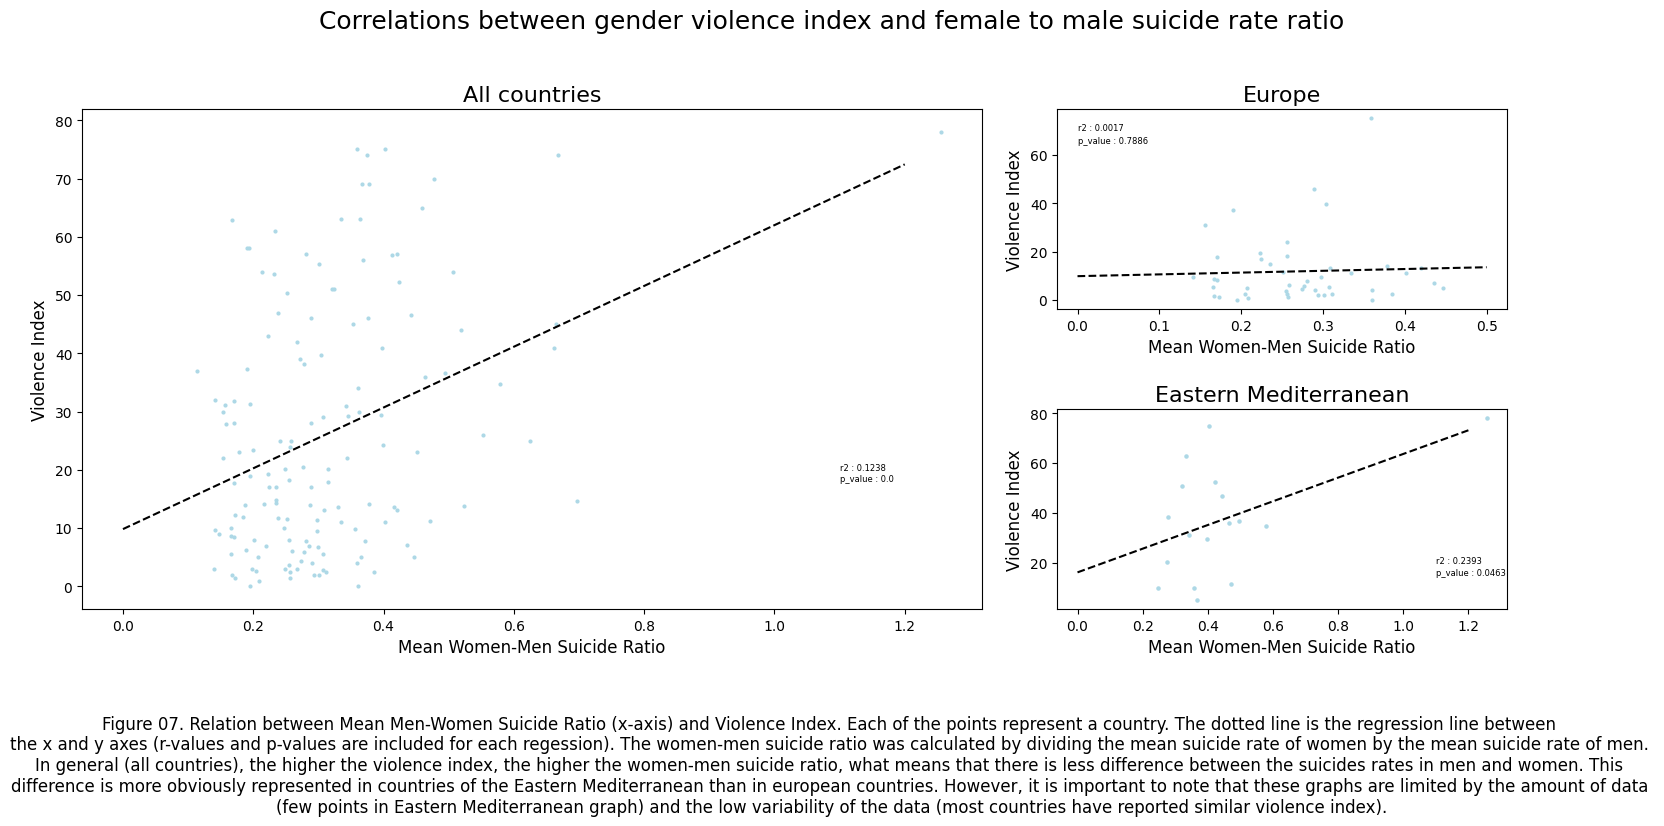

In [15]:
mpl.rcParams.update(mpl.rcParamsDefault) # Changing the plot parameters to default 
violence_women = pd.read_csv("final project/violence_women.csv") # uploading the csv file with external data

data_abbreviations = pd.read_csv("final project/all.csv") # uplading the csv file with the abbreviations


# Replacing the names of the countries so that they match with the original dataset 
for i in np.unique(violence_women["LOCATION"]) : 
    if i == "EL" : 
        violence_women.replace(i, "Greece", inplace = True)
    elif i == "UK" : 
        violence_women.replace(i, "United Kingdom", inplace = True)
    else : 
        violence_women.replace(i, list(data_abbreviations[data_abbreviations["alpha-3"] == i]["name"])[0], inplace = True)

# Some helpful lists for our analysis 
list_suicides_ratio = []
list_violence = []

list_suicides_ratio_middleeast = []
list_suicides_ratio_europe = []

list_violence_middleeast = []
list_violence_europe = []

# For each location in which we have access to the violence on women data... : 
for i in np.unique(violence_women["LOCATION"]) : 
    if i in np.unique(data["location_name"]) : 
        data_int = data[data["location_name"] == i] # Select the suicide data for that location
        data_men = data_int[data_int["sex_name"] == "Male"] # Filtering by gender
        data_women = data_int[data_int["sex_name"] == "Female"]
        mean_men = data_men["val"].mean() # Computing mean for each gender
        mean_women = data_women["val"].mean()
        ratio = mean_women / mean_men # Calculating the ratio of suicides in women / suicides in men
        data_int_violence = violence_women[violence_women["LOCATION"] == i] # Selecting the violence value of our external dataset
        violence = list(data_int_violence["Value"])[0] 
        if list(data_int["WHO region"])[0] == "Europe" :  # Checking the region so that we can plot separetely Europe and Eastern Mediterranean
            list_suicides_ratio_europe.append(ratio)
            list_violence_europe.append(violence)
        if list(data_int["WHO region"])[0] == "Eastern Mediterranean" : 
            list_suicides_ratio_middleeast.append(ratio)
            list_violence_middleeast.append(violence)
        list_suicides_ratio.append(ratio)
        list_violence.append(violence)


# Plotting the obtained results as scatter plots 

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
plt.suptitle('Correlations between gender violence index and female to male suicide rate ratio', fontsize=18, y=1.3, x=0.6)

axs[0].set_position([0.1, 0.1,  0.6, 1])
axs[1].set_position([0.75, 0.7, 0.3, 0.4])
axs[2].set_position([0.75, 0.1, 0.3, 0.4])

# For all regions : 
axs[0].scatter(list_suicides_ratio, list_violence, s = 4, c = "lightblue")
axs[0].set_xlabel("Mean Women-Men Suicide Ratio", fontsize=12)
axs[0].set_ylabel("Violence Index", fontsize=12)
axs[0].set_title("All countries", fontsize=16)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(list_suicides_ratio, list_violence)
x_values = np.array(range(0,13)) / 10
axs[0].plot(x_values, slope*np.array(x_values) + intercept, "--", c = "black")
axs[0].text(1.1,20,  s = "r2 : " + str(round(r_value**2,4)), size = 6)
axs[0].text(1.1,18, s = "p_value : " + str(round(p_value,4)), size = 6)

# For Europe: 
axs[1].scatter(list_suicides_ratio_europe, list_violence_europe, s = 4, c = "lightblue")
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(list_suicides_ratio_europe, list_violence_europe)
x_values = np.array(range(0,6)) / 10
axs[1].set_xlabel("Mean Women-Men Suicide Ratio", fontsize=12)
axs[1].set_ylabel("Violence Index", fontsize=12)
axs[1].set_title("Europe", fontsize=16)
axs[1].plot(x_values, slope*np.array(x_values) + intercept, "--", c = "black")
axs[1].text(0,70,  s = "r2 : " + str(round(r_value**2,4)), size = 6)
axs[1].text(0,65, s = "p_value : " + str(round(p_value,4)), size = 6)

# For Eastern Mediterranean: 
axs[2].scatter(list_suicides_ratio_middleeast, list_violence_middleeast, s = 5, c = "lightblue")
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(list_suicides_ratio_middleeast, list_violence_middleeast)
x_values = np.array(range(0,13)) / 10
axs[2].set_xlabel("Mean Women-Men Suicide Ratio", fontsize=12)
axs[2].set_ylabel("Violence Index", fontsize=12)
axs[2].set_title("Eastern Mediterranean", fontsize=16)
axs[2].plot(x_values, slope*np.array(x_values) + intercept, "--", c = "black")
axs[2].text(1.1,20,  s = "r2 : " + str(round(r_value**2,4)), size = 6)
axs[2].text(1.1,15, s = "p_value : " + str(round(p_value,4)), size = 6)

# Caption of the figure: 

txt="Figure 07. Relation between Mean Men-Women Suicide Ratio (x-axis) and Violence Index. Each of the points represent a country. The dotted line is the regression line between \nthe x and y axes (r-values and p-values are included for each regession). The women-men suicide ratio was calculated by dividing the mean suicide rate of women by the mean suicide rate of men. \nIn general (all countries), the higher the violence index, the higher the women-men suicide ratio, what means that there is less difference between the suicides rates in men and women. This \ndifference is more obviously represented in countries of the Eastern Mediterranean than in european countries. However, it is important to note that these graphs are limited by the amount of data \n(few points in Eastern Mediterranean graph) and the low variability of the data (most countries have reported similar violence index)."
plt.figtext(0.6, -0.3, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

# Genre
- Which genre of data story did you use?
> For our narrative visualization project, we have selected the magazine style as our genre, as it offeres a visually appealing and informative way of presenting data and information. However, we wanted to enhance the user experience by incorporating annotated charts and maps, which can help to convey complex information in a more digestible and accesible format. We have also decided to add a layer of interactivity in some graphs, allowing users to engage with the data on a deeper level and explore different perspectives and insights. 

- Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?

> For both genres, magazine style and annotated graph and maps, we used as visual structuring a consistent visual platform because it provided a sense of coherence and is easy to follow for the readers, who can navigate through the different sections.
> Also for the annotated map we used a timebar to provide a temporal perspective. It allows the reader to understand how different changes occurred over time in relation to the geographic features represented on the map.
> 
> As highliting tools, we used feature distinction, such as color and shape, to easily distinguish important information and zooming specially on the map so users can explore and interact with it, making it more engaging and appealing.


- Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?

> For the ordering category of narrative structure, we used linear ordering since it is an effective way of presenting informatino in a clear and logical sequence.
>
> To add some interactivity to the narrative structure of annotated graph and maps we used hover-highlighting and selection so the user is allowed to choose specific elements to focus on. This way the reader can explore and interact with the information in a more dynamic way and reveal additional details or insights that are not told in the magazine.
>
> Finally, for the messaging category we chose to implement captions and headlines to guide the reader's attention to key points, introductory texts to provide important context that can help to better understand the information presented. Also annotations were added to explain more specific aspects and to deepen the information displayed.


# Visualizations
Explain the visualizations you've chosen and why are they right for the story you want to tell?

> The chosen visualizations have been:
>
> - An interactive map. We wanted the map to show an overall perspective of suicide rates around the world. We used this visualiation at the very beginning of the story to provide context, without getting into anything too specific. In addition, we decided to add an interactive layer to make it visually engaging and to capture the reader's attention. A timebar was our choice of interactive tool as we considered it was the best way to display suicide rates evolution in an interactive way. As well, we added a tooltip feature so that the reader can access the specific information of a country.
> 
> - Scatter plots and line charts. Both static and interactive to display distributions, trends and evolution. We chose this type of visualization because it was the most suitable for quantitative data analysis. The aim of these graphs is to show how two different features of the data can be related. In two of these plots we added interactive tools in which you can select the groups of data through the legend that appear so that the user can analyze those that catch his attention without having to decipher the information in an oversaturated and overly complex visualization. This type of visualization is appropiate for our story because we emphasize certain aspects of the data for some WHO regions or specific age ranges so that the user can do 1-to-1 comparisons.
    
 




# Discussion
- What went well?

Suicides are a very complex topic influenced by many different variables. Our main goal during the project was to identify the reasons why there are some countries in which the suicides rates behave different than in others. For that, we have tried to analyzed different data sources to combine them with our original data. This data is not found for all countries, and it is collected in many different ways, what makes comparisons really difficult. However, we managed to make a really insightful overview of the distribution of suicides rates among different ages and genders on different geographical locations. We found out that these distributions have more in common than what we initially had thought. This suggests that, when working with this social phenomenum, the potential factors affecting our population may be common for all countries (suicides rates did not show any type of correlation with some studied data, such as gini index or GDP per capita). 

Using data analysis and visualizations (we did not have any previous assumptions on this), we realized there was only one country in which the suicides rates in women were higher than those in men. This country was Afghanistan. Based on this discovery, we continued our analysis merging our findings with a dataset of gender violence from the Organisation for Economic Co-operation and Development (OECD) (https://data.oecd.org/inequality/violence-against-women.htm), as Afghanistan is known to be one of the countries with the highest gender violence in the world. We wanted to check if there was a relation between the gender violence and the women-men suicide ratio. When calculating the regression line between women-men suicide ratio and gender violence (Figure 07) in all countries, scipy statistics gave us a p-value of almost 0. This means that there is almost a 100% probability that there exists some kind of correlation between this two variables and that the calculated line is not by chance. It must be noted that we are working with a variable (suicides rates) with very low variability and that our dataset is small (only one point per country), so statistics (especially correlations) must be carefully interpreted. 

In conclusion, we were able to identify a pattern in a very complex dataset (for a very complex field in our society influenced by many confounding variables) thanks to our social data analysis and visualizations skills. 

- What is still missing? What could be improved?, Why?

For the sake of simplicity, we decided to plot only 2D relationships between our target variable (suicide rates) and our external variable (gender violence). In the future, it could be optimal to include more variables and include them in a Machine Learning model to study if the combination of several variables could improve our understanding of suicides. Furthermore, and due to the fact that most countries have a similar distribution for suicide rates, it would be interesting to select only those countries that present differents (as we did in this project with Afghanistan) and take a closer look into them. 

# Contributions
- Hugo Alcalde: Basic stats, visualizations, and discussion. 
- María Ángeles Jiménez: Basic stats, data analysis and interactive visualizations
- Carolina Urzay: Visualizations, basic stats, and Github page. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b5bf96ba-adb7-4953-b8c2-860dba51695b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>